In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from statistics import mean
from functools import reduce
import math
from scipy.optimize import curve_fit

In [22]:
file = pd.ExcelFile("data.xlsx")

In [23]:
U_rev = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #В
I_rev = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #мА


In [24]:
file = pd.ExcelFile("data_2.xlsx")

In [25]:
U_dir = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #В
I_dir = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #мА

In [26]:
U = np.concatenate ((U_rev[1:], U_dir[1:]))
I = np.concatenate ((I_rev[1:], I_dir[1:]))

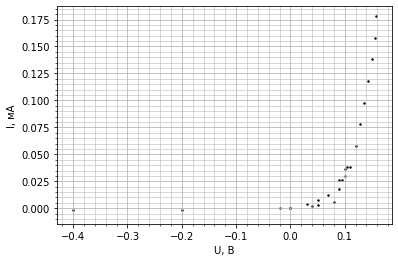

In [35]:
fig, ax = plt.subplots()
plt.scatter(U_rev[:-7], I_rev[:-7], color = 'black', s = 2)
plt.scatter(U_dir, I_dir, color = 'black', s = 2)


plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('I, мА')
ax.set_xlabel('U, В')
plt.show()
fig.savefig('I(U).png', dpi = 1000)

Ищем ток насыщения:

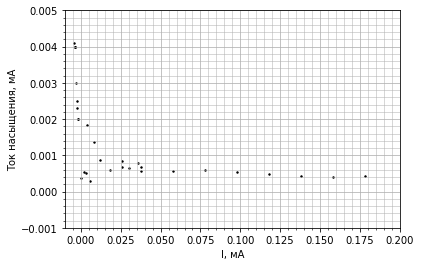

In [33]:
fig, ax = plt.subplots()

I_d0 =[0]*(len(I))
fi_t = 0.026 #температурный потенциал
for i in range (len(I_d0)):
    if U[i]!=0:
        I_d0[i] = I[i]/(np.exp(U[i]/fi_t)-1)


plt.scatter(I, I_d0, color = 'black', s = 2)
plt.grid(True)
ax.minorticks_on()
plt.axis([-0.01, 0.2, -0.001, 0.005])
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('Ток насыщения, мА')
ax.set_xlabel('I, мА')
plt.show()
fig.savefig('Id0(I).png', dpi = 1000)

Ищем ток насыщения и параметр идеальности диода (пункт 5):

Ток насыщения =  0.0043542319437399665 мА
Theta =  1.2878039646257056


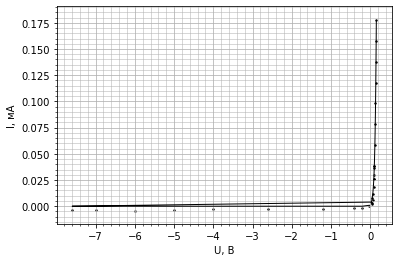

In [34]:
fig, ax = plt.subplots()
plt.scatter(U,I, color = 'black', s = 2)

[a, b], res1 = curve_fit(lambda x1,a,b: a*np.exp(b*x1-1),  U[:],  I)
I_new = a * np.exp(b * U-1)

plt.plot(U, I_new, linewidth = 1, color = 'black')

print('Ток насыщения = ', a, 'мА')
print('Theta = ', 1/(b*fi_t))


plt.grid(True)
ax.minorticks_on()

ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('I, мА')
ax.set_xlabel('U, В')
plt.show()
fig.savefig('I(U)_1.png', dpi = 1000)
